# Standard Analysis Notebook
CellPLATO


In [1]:
from initialization.config import *

from data_processing.cell_identifier import *
from data_processing.cleaning_formatting_filtering import *
from data_processing.clustering import *
from data_processing.data_io import *
from data_processing.data_wrangling import *
from data_processing.dimensionality_reduction import *
from data_processing.measurements import *
from data_processing.migration_calculations import *
from data_processing.pipelines import *
from data_processing.shape_calculations import *
from data_processing.statistics import *
from data_processing.time_calculations import *
from data_processing.trajectory_clustering import *

from visualization.comparative_visualization import *
from visualization.cluster_visualization import *
from visualization.filter_visualization import *
from visualization.low_dimension_visualization import *
from visualization.panel_apps import *
from visualization.plots_of_differences import *
from visualization.small_multiples import *
from visualization.superplots import *
from visualization.timecourse_visualization import *
from visualization.trajectory_visualization import *

Dataset in current notebook:  20x_100x_hightr
Initializing:  20x_100x_hightr
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D://Michael_Shannon/CELLPLATO2022_TESTING/cellPLATO(dev)/20x_100x_hightr\2022-07-14_13-42-12-845537\plots/
Using unique embedding per dataset shortname:  20x_100x_hightr
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Dataset in current notebook:  20x_100x_hightr


In [2]:
if os.path.exists(SAVED_DATA_PATH + 'dr_df.csv'):
    print(SAVED_DATA_PATH + 'dr_df_.csv',' exists, loading dataframes...')
    
    # Load existing (preprocessed) data
    comb_df = pd.read_csv(SAVED_DATA_PATH + 'comb_df.csv')
    dr_df = pd.read_csv(SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df = pd.read_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')
    tavg_df = pd.read_csv(SAVED_DATA_PATH + 'tavg_df.csv')
else:
    
    print('File doesnt exist.')

D://Michael_Shannon/CELLPLATO2022_TESTING/cellPLATO(dev)/20x_100x_hightr\saved_data/dr_df_.csv  exists, loading dataframes...


In [3]:
lab_dr_df

Unnamed: 0    index  rep_row_ind  frame           x           y    z  \
0                0        0            0    0.0  703.734802    6.817679  0.0   
1                1        1            1    0.0  117.602692   13.414142  0.0   
2                2        3            3    0.0  835.302185   20.613852  0.0   
3                3        5            5    0.0  758.011292   52.879700  0.0   
4                4        6            6    0.0  640.589478   94.297211  0.0   
...            ...      ...          ...    ...         ...         ...  ...   
534683      534683  1117931          120   50.0  721.120728  913.287354  0.0   
534684      534684  1117932          121   51.0   82.328804  282.765411  0.0   
534685      534685  1117933          122   51.0  719.978882  917.529785  0.0   
534686      534686  1117934          123   52.0   79.365227  288.805206  0.0   
534687      534687  1117935          124   52.0  716.739746  917.610779  0.0   

          _  particle        area  ...       PC7       PC8       PC9  \
0       0.0       4.0   52.194789  ...  1.667131 -1.373246  1.117967   
1       0.0       5.0   85.645593  ...  1.685539 -1.750184  0.770251   
2       0.0       7.0  274.815657  ... -0.319804 -0.978197 -1.065589   
3       0.0       9.0   76.706154  ...  0.379685 -0.291141  0.948609   
4       0.0      10.0  175.616721  ...  0.027560  0.066244 -1.441489   
...     ...       ...         ...  ...       ...       ...       ...   
534683  0.0       2.0  406.702827  ... -3.106818 -0.582251 -0.192115   
534684  0.0       1.0  393.158660  ... -3.765609 -0.588529 -0.505711   
534685  0.0       2.0  403.932169  ... -2.456154 -1.103304 -0.323232   
534686  0.0       1.0  378.870308  ... -3.215710 -1.058286 -0.305039   
534687  0.0       2.0  399.135038  ... -3.013724 -1.106445 -0.117725   

            PC10      tSNE1      tSNE2      UMAP1      UMAP2  label  traj_id  
0      -0.898176 -30.050372  11.099255   4.144462   8.183418      7     -1.0  
1      -0.703362 -17.062333  25.660226   4.204903   4.575233      7     -1.0  
2       1.675320  50.979534  -5.302554  14.248267   8.319053      7     -1.0  
3       0.486242 -22.972405  -5.855695   4.126075   7.672418      7     -1.0  
4       0.981790   7.195073 -39.857819   9.691433   9.479952      7     -1.0  
...          ...        ...        ...        ...        ...    ...      ...  
534683 -0.188191  36.476510  50.117587  21.793660   9.834142      2     -1.0  
534684 -0.444860  36.512270  50.051603  21.863962   9.726665      2     -1.0  
534685 -0.888420  37.258449  50.071942  21.758417  10.156020      2     -1.0  
534686 -0.324612  38.086157  49.734521  21.713800  10.349927      2     -1.0  
534687 -0.027428  38.264907  50.164218  21.632080  10.283919      2     -1.0  

[534688 rows x 67 columns]

# Load the data from h5 files in folder structure

In [41]:
# Get the experiment list from the experiments listed in the config 
exp_list = populate_experiment_list()
display(exp_list)

Condition                             Experiment  \
0     CAMKO_20x            Condition_20x_ICAMKO_tracks   
1     CAMWT_20x            Condition_20x_ICAMWT_tracks   
2   NK92KO_100x        Condition_MAX_NK92KO2_4__tracks   
3   NK92KO_100x        Condition_MAX_NK92KO2_6__tracks   
4   NK92KO_100x         Condition_MAX_NK92KO_1__tracks   
5   NK92KO_100x         Condition_MAX_NK92KO_3__tracks   
6   NK92KO_100x         Condition_MAX_NK92KO_4__tracks   
7   NK92KO_100x         Condition_MAX_NK92KO_5__tracks   
8   NK92KO_100x         Condition_MAX_NK92KO_7__tracks   
9   NK92KO_100x          Condition_MAX_NK92KO_x_tracks   
10  NK92KO_100x           Condition_MAX_NK92KO__tracks   
11  NK92WT_100x        Condition_MAX_NK92WT2_3__tracks   
12  NK92WT_100x        Condition_MAX_NK92WT2_6__tracks   
13  NK92WT_100x        Condition_MAX_NK92WT2_7__tracks   
14  NK92WT_100x         Condition_MAX_NK92WT_2__tracks   
15  NK92WT_100x         Condition_MAX_NK92WT_3__tracks   
16  NK92WT_100x         Condition_MAX_NK92WT_4__tracks   
17  NK92WT_100x         Condition_MAX_NK92WT_5__tracks   
18  NK92WT_100x         Condition_MAX_NK92WT_6__tracks   
19  NK92WT_100x         Condition_MAX_NK92WT_8__tracks   
20  NK92WT_100x  Condition_MAX_WT_100x_mScar_2__tracks   
21  NK92WT_100x  Condition_MAX_WT_100x_mScar_8__tracks   
22  NK92WT_100x  Condition_MAX_WT_100x_mScar_9__tracks   

                             Replicate_ID Condition_shortlabel  \
0             Condition_20x_ICAMKO_tracks               KO_20x   
1             Condition_20x_ICAMWT_tracks               WT_20x   
2         Condition_MAX_NK92KO2_4__tracks              KO_100x   
3         Condition_MAX_NK92KO2_6__tracks              KO_100x   
4          Condition_MAX_NK92KO_1__tracks              KO_100x   
5          Condition_MAX_NK92KO_3__tracks              KO_100x   
6          Condition_MAX_NK92KO_4__tracks              KO_100x   
7          Condition_MAX_NK92KO_5__tracks              KO_100x   
8          Condition_MAX_NK92KO_7__tracks              KO_100x   
9           Condition_MAX_NK92KO_x_tracks              KO_100x   
10           Condition_MAX_NK92KO__tracks              KO_100x   
11        Condition_MAX_NK92WT2_3__tracks              WT_100x   
12        Condition_MAX_NK92WT2_6__tracks              WT_100x   
13        Condition_MAX_NK92WT2_7__tracks              WT_100x   
14         Condition_MAX_NK92WT_2__tracks              WT_100x   
15         Condition_MAX_NK92WT_3__tracks              WT_100x   
16         Condition_MAX_NK92WT_4__tracks              WT_100x   
17         Condition_MAX_NK92WT_5__tracks              WT_100x   
18         Condition_MAX_NK92WT_6__tracks              WT_100x   
19         Condition_MAX_NK92WT_8__tracks              WT_100x   
20  Condition_MAX_WT_100x_mScar_2__tracks              WT_100x   
21  Condition_MAX_WT_100x_mScar_8__tracks              WT_100x   
22  Condition_MAX_WT_100x_mScar_9__tracks              WT_100x   

   Replicate_shortlabel  
0              KO_20x_0  
1              WT_20x_0  
2             KO_100x_0  
3             KO_100x_1  
4             KO_100x_2  
5             KO_100x_3  
6             KO_100x_4  
7             KO_100x_5  
8             KO_100x_6  
9             KO_100x_7  
10            KO_100x_8  
11            WT_100x_0  
12            WT_100x_1  
13            WT_100x_2  
14            WT_100x_3  
15            WT_100x_4  
16            WT_100x_5  
17            WT_100x_6  
18            WT_100x_7  
19            WT_100x_8  
20            WT_100x_9  
21           WT_100x_10  
22           WT_100x_11

##### Optionally, override the experiment list in the config and select a subset.

In [22]:
# # Local overide to CONDITION_SHORTLABELS in Notebook.
# conditions_to_include = ['WT_20x', 'KO_20x','WT_100x', 'KO_100x']
# # conditions_to_include = ['WT_20x', 'KO_20x']
# # conditions_to_include = ['WT_100x', 'KO_100x']

# # conditions_to_include = ['WT Day 0', 'WT Day 7']
# # # conditions_to_include = ['WT Day 0']
# # # conditions_to_include = ['WT Day 7']

# # Filter exp_list using CONDITION_SHORTLABELS
# exp_list = exp_list[exp_list['Condition_shortlabel'].isin(conditions_to_include)]
# display(exp_list)

Condition                             Experiment  \
2   NK92KO_100x        Condition_MAX_NK92KO2_4__tracks   
3   NK92KO_100x        Condition_MAX_NK92KO2_6__tracks   
4   NK92KO_100x         Condition_MAX_NK92KO_1__tracks   
5   NK92KO_100x         Condition_MAX_NK92KO_3__tracks   
6   NK92KO_100x         Condition_MAX_NK92KO_4__tracks   
7   NK92KO_100x         Condition_MAX_NK92KO_5__tracks   
8   NK92KO_100x         Condition_MAX_NK92KO_7__tracks   
9   NK92KO_100x          Condition_MAX_NK92KO_x_tracks   
10  NK92KO_100x           Condition_MAX_NK92KO__tracks   
11  NK92WT_100x        Condition_MAX_NK92WT2_3__tracks   
12  NK92WT_100x        Condition_MAX_NK92WT2_6__tracks   
13  NK92WT_100x        Condition_MAX_NK92WT2_7__tracks   
14  NK92WT_100x         Condition_MAX_NK92WT_2__tracks   
15  NK92WT_100x         Condition_MAX_NK92WT_3__tracks   
16  NK92WT_100x         Condition_MAX_NK92WT_4__tracks   
17  NK92WT_100x         Condition_MAX_NK92WT_5__tracks   
18  NK92WT_100x         Condition_MAX_NK92WT_6__tracks   
19  NK92WT_100x         Condition_MAX_NK92WT_8__tracks   
20  NK92WT_100x  Condition_MAX_WT_100x_mScar_2__tracks   
21  NK92WT_100x  Condition_MAX_WT_100x_mScar_8__tracks   
22  NK92WT_100x  Condition_MAX_WT_100x_mScar_9__tracks   

                             Replicate_ID Condition_shortlabel  \
2         Condition_MAX_NK92KO2_4__tracks              KO_100x   
3         Condition_MAX_NK92KO2_6__tracks              KO_100x   
4          Condition_MAX_NK92KO_1__tracks              KO_100x   
5          Condition_MAX_NK92KO_3__tracks              KO_100x   
6          Condition_MAX_NK92KO_4__tracks              KO_100x   
7          Condition_MAX_NK92KO_5__tracks              KO_100x   
8          Condition_MAX_NK92KO_7__tracks              KO_100x   
9           Condition_MAX_NK92KO_x_tracks              KO_100x   
10           Condition_MAX_NK92KO__tracks              KO_100x   
11        Condition_MAX_NK92WT2_3__tracks              WT_100x   
12        Condition_MAX_NK92WT2_6__tracks              WT_100x   
13        Condition_MAX_NK92WT2_7__tracks              WT_100x   
14         Condition_MAX_NK92WT_2__tracks              WT_100x   
15         Condition_MAX_NK92WT_3__tracks              WT_100x   
16         Condition_MAX_NK92WT_4__tracks              WT_100x   
17         Condition_MAX_NK92WT_5__tracks              WT_100x   
18         Condition_MAX_NK92WT_6__tracks              WT_100x   
19         Condition_MAX_NK92WT_8__tracks              WT_100x   
20  Condition_MAX_WT_100x_mScar_2__tracks              WT_100x   
21  Condition_MAX_WT_100x_mScar_8__tracks              WT_100x   
22  Condition_MAX_WT_100x_mScar_9__tracks              WT_100x   

   Replicate_shortlabel  
2             KO_100x_0  
3             KO_100x_1  
4             KO_100x_2  
5             KO_100x_3  
6             KO_100x_4  
7             KO_100x_5  
8             KO_100x_6  
9             KO_100x_7  
10            KO_100x_8  
11            WT_100x_0  
12            WT_100x_1  
13            WT_100x_2  
14            WT_100x_3  
15            WT_100x_4  
16            WT_100x_5  
17            WT_100x_6  
18            WT_100x_7  
19            WT_100x_8  
20            WT_100x_9  
21           WT_100x_10  
22           WT_100x_11

In [65]:
btrack_unpack

<function data_processing.data_wrangling.btrack_unpack(path)>

In [71]:
comb_df = combine_dataframes(exp_list)

Loading existing file: CAMKO_20x, Condition_20x_ICAMKO_tracks.csv
Loading existing file: CAMWT_20x, Condition_20x_ICAMWT_tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO2_4__tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO2_6__tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO_1__tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO_3__tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO_4__tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO_5__tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO_7__tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO_x_tracks.csv
Loading existing file: NK92KO_100x, Condition_MAX_NK92KO__tracks.csv
Loading existing file: NK92WT_100x, Condition_MAX_NK92WT2_3__tracks.csv
Loading existing file: NK92WT_100x, Condition_MAX_NK92WT2_6__tracks.csv
Loading existing file: NK92WT_100x, Condition_MAX_NK92WT2_7__tracks.csv
Loading existi

In [74]:
comb_df_ = factor_calibration(comb_df,mixed_calibration=True)
comb_df__ = factor_calibration(comb_df,mixed_calibration=False)


Using mixed_calibration.
CAMKO_20x 0.537 0.016666666666666666
CAMWT_20x 0.537 0.016666666666666666
NK92KO_100x 0.107 0.016666666666666666
NK92WT_100x 0.107 0.016666666666666666


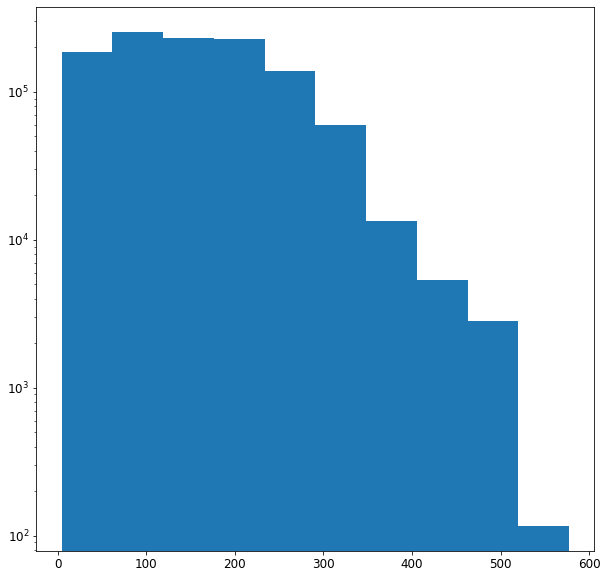

In [82]:
plt.hist(comb_df_['area'])
plt.yscale('log')

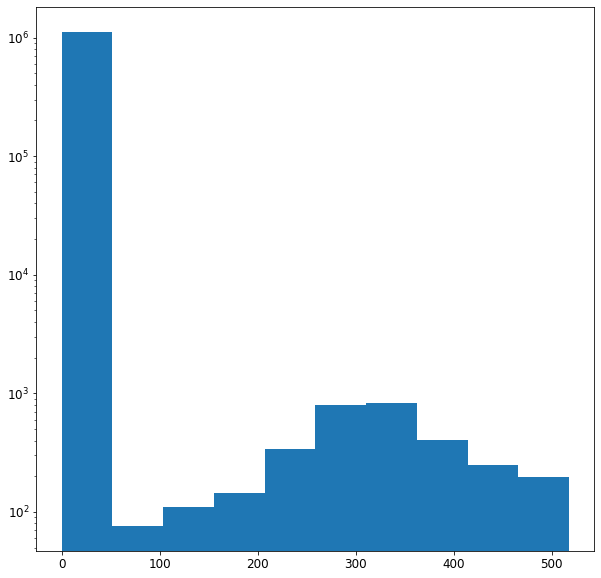

In [83]:
plt.hist(comb_df__['area'])
plt.yscale('log')

In [5]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'comb_df' in locals():
    
    print('Using loaded comb_df')
    
else: 

    # Load, process and combine the dataframes (including segmentation and migration calculations)
    comb_df = combine_dataframes(exp_list)
    comb_df = measurement_pipeline(comb_df)

Using loaded comb_df


In [ ]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
# comb_df = combine_dataframes(exp_list)
# comb_df = measurement_pipeline(comb_df)

## Filtering data (upstream of dimensionality reduction)

In [ ]:
# User-defined filters in dict {factor:(min, max)}
data_filters = {
#   "speed": (10, 100),
  "area": (0, 10000), # Warning: range will change if self-normalized
  "ntpts": (0,1000)
}

# Returns a filtered dataframe, while also adding included column to comb_df
filt_df, filt_counts = apply_filters(comb_df,filter_dict=data_filters)

fig = visualize_filtering(comb_df, filt_counts)

# Time-averaged dataframe and summaries

In [6]:
''' To go into preprocessed conditional'''

if 'tavg_df' in locals():
    
    print('Using loaded tavg_df')
    
else: 
    # Process a time-averaged DataFrame
    tavg_df = time_average(filt_df)
    
display(tavg_df)

Using loaded tavg_df


Unnamed: 0   Cond_label    Condition Condition_shortlabel       MSD  \
0               0    CAMKO_20x    CAMKO_20x               KO_20x  0.002694   
1               1    CAMKO_20x    CAMKO_20x               KO_20x  0.002644   
2               2    CAMKO_20x    CAMKO_20x               KO_20x  0.003774   
3               3    CAMKO_20x    CAMKO_20x               KO_20x  0.002651   
4               4    CAMKO_20x    CAMKO_20x               KO_20x  0.002561   
...           ...          ...          ...                  ...       ...   
15566       15566  NK92WT_100x  NK92WT_100x              WT_100x  0.265255   
15567       15567  NK92WT_100x  NK92WT_100x              WT_100x  0.264129   
15568       15568  NK92WT_100x  NK92WT_100x              WT_100x  0.251840   
15569       15569  NK92WT_100x  NK92WT_100x              WT_100x  0.216749   
15570       15570  NK92WT_100x  NK92WT_100x              WT_100x  0.327002   

       Rep_label                 Replicate_ID Replicate_shortlabel         _  \
0            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.000000   
1            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.000000   
2            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.047619   
3            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.000000   
4            0.0  Condition_20x_ICAMKO_tracks             KO_20x_0  0.008333   
...          ...                          ...                  ...       ...   
15566       22.0              WT_100x_mScar_9           WT_100x_11  0.041667   
15567       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   
15568       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   
15569       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   
15570       22.0              WT_100x_mScar_9           WT_100x_11  0.000000   

             area  ...  turn_angle        uniq_id  unique_id           x  \
0       55.795405  ...    3.857818            inf        0.0  703.551700   
1       91.610769  ...   -0.044095            inf        1.0  113.454665   
2      249.919800  ...    0.182181   3.367003e+39        2.0  835.733567   
3       83.518526  ...    5.000860            inf        3.0  749.611425   
4      143.836054  ...   -4.657220            inf        4.0  638.229060   
...           ...  ...         ...            ...        ...         ...   
15566  418.921772  ...   -4.576168  4.608775e+141    15566.0  158.428015   
15567  400.936185  ...   -9.038936  4.728132e+138    15567.0  753.432219   
15568  276.338311  ...    2.152941   9.175843e+69    15568.0   66.026301   
15569   35.892615  ...   14.178595   5.580581e+10    15569.0  845.464661   
15570  395.723236  ...  -28.676176   1.121120e+05    15570.0  131.587257   

            x_pix       x_um           y       y_pix       y_um         z  
0      703.551700  75.280032    8.205814    8.205814   0.878022  0.000000  
1      113.454665  12.139649   13.563370   13.563370   1.451281  0.000000  
2      835.733567  89.423492   20.574038   20.574038   2.201422  0.018385  
3      749.611425  80.208422   68.239388   68.239388   7.301614  0.000000  
4      638.229060  68.290509  105.183373  105.183373  11.254621  0.000395  
...           ...        ...         ...         ...        ...       ...  
15566  158.428015  16.951798  268.086266  268.086266  28.685230  0.023687  
15567  753.432219  80.617247  833.766415  833.766415  89.213006  0.000000  
15568   66.026301   7.064814  316.551136  316.551136  33.870972  0.000000  
15569  845.464661  90.464719  775.387787  775.387787  82.966493  0.000000  
15570  131.587257  14.079837  242.732147  242.732147  25.972340  0.000000  

[15571 rows x 52 columns]

In [28]:
# Average, n per condition
factor = 'perimeter'
stats_table(tavg_df, factor)

Returning stats_table using test:  st.ttest_ind  for factor:  perimeter
Note: for exploratory purposes only, no multiple comparison correction is being applied.


CAMKO_20x     CAMWT_20x   NK92KO_100x   NK92WT_100x
CAMKO_20x             NaN  4.282627e-59  3.378416e-13  2.913507e-16
CAMWT_20x    4.282627e-59           NaN  1.478441e-33  6.334125e-39
NK92KO_100x  3.378416e-13  1.478441e-33           NaN  1.612026e-01
NK92WT_100x  2.913507e-16  6.334125e-39  1.612026e-01           NaN

In [29]:
# Time-averaged plots of differences
ctl_label = CONDITIONS_TO_INCLUDE[0]

plots_of_differences_plotly(tavg_df, factor=factor, ctl_label=ctl_label)#, ='CTL_LABEL')

KO_20x vs WT_20x: P = 0.0
P =  4.2826271227618455e-59  (Using t-test without multiple comparison correction)
------
WT_100x vs WT_20x: P = 0.0
P =  6.33412541733756e-39  (Using t-test without multiple comparison correction)
------
KO_100x vs WT_20x: P = 0.0
P =  1.478441023310681e-33  (Using t-test without multiple comparison correction)
------


In [30]:
# Time-averaged superplots
superplots_plotly(tavg_df, factor, t='timeaverage')

In [31]:

# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df = average_per_condition(tavg_df)

# Per replicate
repavg_df = average_per_condition(tavg_df, avg_per_rep=True)


In [38]:
# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df,std,n = average_per_condition(tavg_df, avg_per_rep=False)

display(avg_df)
display(std)
display(n)

Cond_label    Condition Condition_shortlabel       MSD  Rep_label  \
0    CAMKO_20x    CAMKO_20x               KO_20x  0.006518   0.000000   
1    CAMWT_20x    CAMWT_20x               WT_20x  0.005737   1.000000   
2  NK92KO_100x  NK92KO_100x              KO_100x  0.097392   5.157895   
3  NK92WT_100x  NK92WT_100x              WT_100x  0.129385  17.607143   

  Replicate_ID Replicate_shortlabel  Unnamed: 0         _        area  ...  \
0           NA                   NA      5366.0  0.064637  105.541163  ...   
1           NA                   NA     13118.5  0.060156   85.960222  ...   
2           NA                   NA     15523.5  0.010827  228.979604  ...   
3           NA                   NA     15556.5  0.002429  283.121617  ...   

   turn_angle  uniq_id  unique_id           x       x_pix       x_um  \
0   -0.542854      inf     5366.0  538.774229  538.774229  57.648842   
1    0.297638      inf    13118.5  485.807893  485.807893  51.981445   
2   -2.350604      inf    15523.5  538.629612  538.629612  57.633368   
3   -3.256765      inf    15556.5  473.549176  473.549176  50.669762   

            y       y_pix       y_um         z  
0  497.048348  497.048348  53.184173  0.002978  
1  521.933542  521.933542  55.846889  0.002826  
2  505.248083  505.248083  54.061545  0.005211  
3  633.885998  633.885998  67.825802  0.002231  

[4 rows x 52 columns]

Cond_label    Condition Condition_shortlabel       MSD  Rep_label  \
0    CAMKO_20x    CAMKO_20x               KO_20x  0.020174   0.000000   
1    CAMWT_20x    CAMWT_20x               WT_20x  0.013037   0.000000   
2  NK92KO_100x  NK92KO_100x              KO_100x  0.055319   2.354137   
3  NK92WT_100x  NK92WT_100x              WT_100x  0.080344   3.593608   

  Replicate_ID Replicate_shortlabel   Unnamed: 0         _        area  ...  \
0           NA                   NA  3098.494554  0.129972   86.242013  ...   
1           NA                   NA  1377.702072  0.129045   66.894885  ...   
2           NA                   NA    11.113055  0.034695  134.292652  ...   
3           NA                   NA     8.225975  0.008466   97.726256  ...   

   turn_angle  uniq_id    unique_id           x       x_pix       x_um  \
0   30.754275      NaN  3098.494554  293.353504  293.353504  31.388825   
1   32.432257      NaN  1377.702072  315.280766  315.280766  33.735042   
2   25.089462      NaN    11.113055  186.500595  186.500595  19.955564   
3   14.841509      NaN     8.225975  254.096697  254.096697  27.188347   

            y       y_pix       y_um         z  
0  312.279852  312.279852  33.413944  0.019987  
1  343.594705  343.594705  36.764633  0.020614  
2  128.853220  128.853220  13.787294  0.017414  
3  236.716086  236.716086  25.328621  0.006941  

[4 rows x 52 columns]

Cond_label    Condition Condition_shortlabel      MSD  Rep_label  \
0    CAMKO_20x    CAMKO_20x               KO_20x  10733.0    10733.0   
1    CAMWT_20x    CAMWT_20x               WT_20x   4772.0     4772.0   
2  NK92KO_100x  NK92KO_100x              KO_100x     38.0       38.0   
3  NK92WT_100x  NK92WT_100x              WT_100x     28.0       28.0   

  Replicate_ID Replicate_shortlabel  Unnamed: 0        _     area  ...  \
0           NA                   NA     10733.0  10733.0  10733.0  ...   
1           NA                   NA      4772.0   4772.0   4772.0  ...   
2           NA                   NA        38.0     38.0     38.0  ...   
3           NA                   NA        28.0     28.0     28.0  ...   

   turn_angle  uniq_id  unique_id        x    x_pix     x_um        y  \
0     10733.0  10733.0    10733.0  10733.0  10733.0  10733.0  10733.0   
1      4772.0   4772.0     4772.0   4772.0   4772.0   4772.0   4772.0   
2        38.0     38.0       38.0     38.0     38.0     38.0     38.0   
3        28.0     28.0       28.0     28.0     28.0     28.0     28.0   

     y_pix     y_um        z  
0  10733.0  10733.0  10733.0  
1   4772.0   4772.0   4772.0  
2     38.0     38.0     38.0  
3     28.0     28.0     28.0  

[4 rows x 52 columns]

In [39]:
avg_df['perimeter']

0    38.736583
1    33.446804
2    62.685300
3    70.033193
Name: perimeter, dtype: float64

In [12]:
cond_stats = average_per_condition(tavg_df, avg_per_rep=False)
comparative_bar(cond_stats, x='Condition', y=factor, to_plot='avg',title='_per_condition_')

In [13]:
# Average, n per replicate
rep_stats = average_per_condition(tavg_df, avg_per_rep=True)
comparative_bar(rep_stats, x='Replicate_ID', y=factor, to_plot='avg', title='_per_replicate_')

# Dimensionality Reduction

In [14]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'dr_df' in locals():
    
    print('Using loaded dr_df')
    
else: 

    dr_df = dr_pipeline(comb_df, dr_factors=DR_FACTORS) 

Using loaded dr_df


['KO_20x' 'WT_20x' 'KO_100x' 'WT_100x']


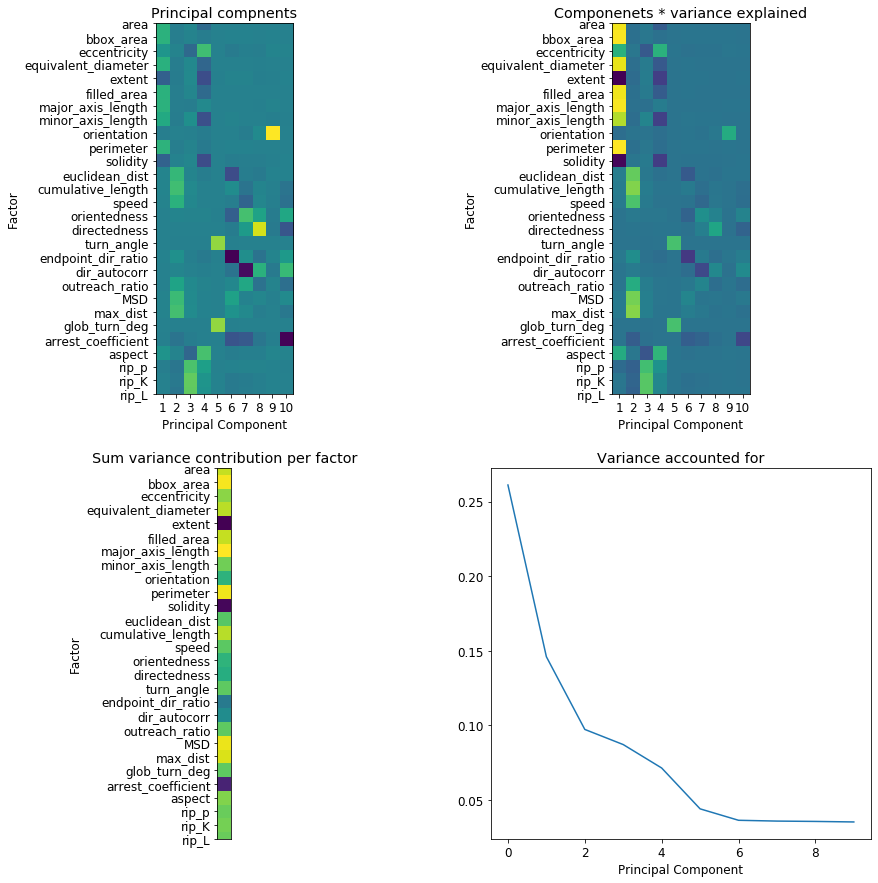

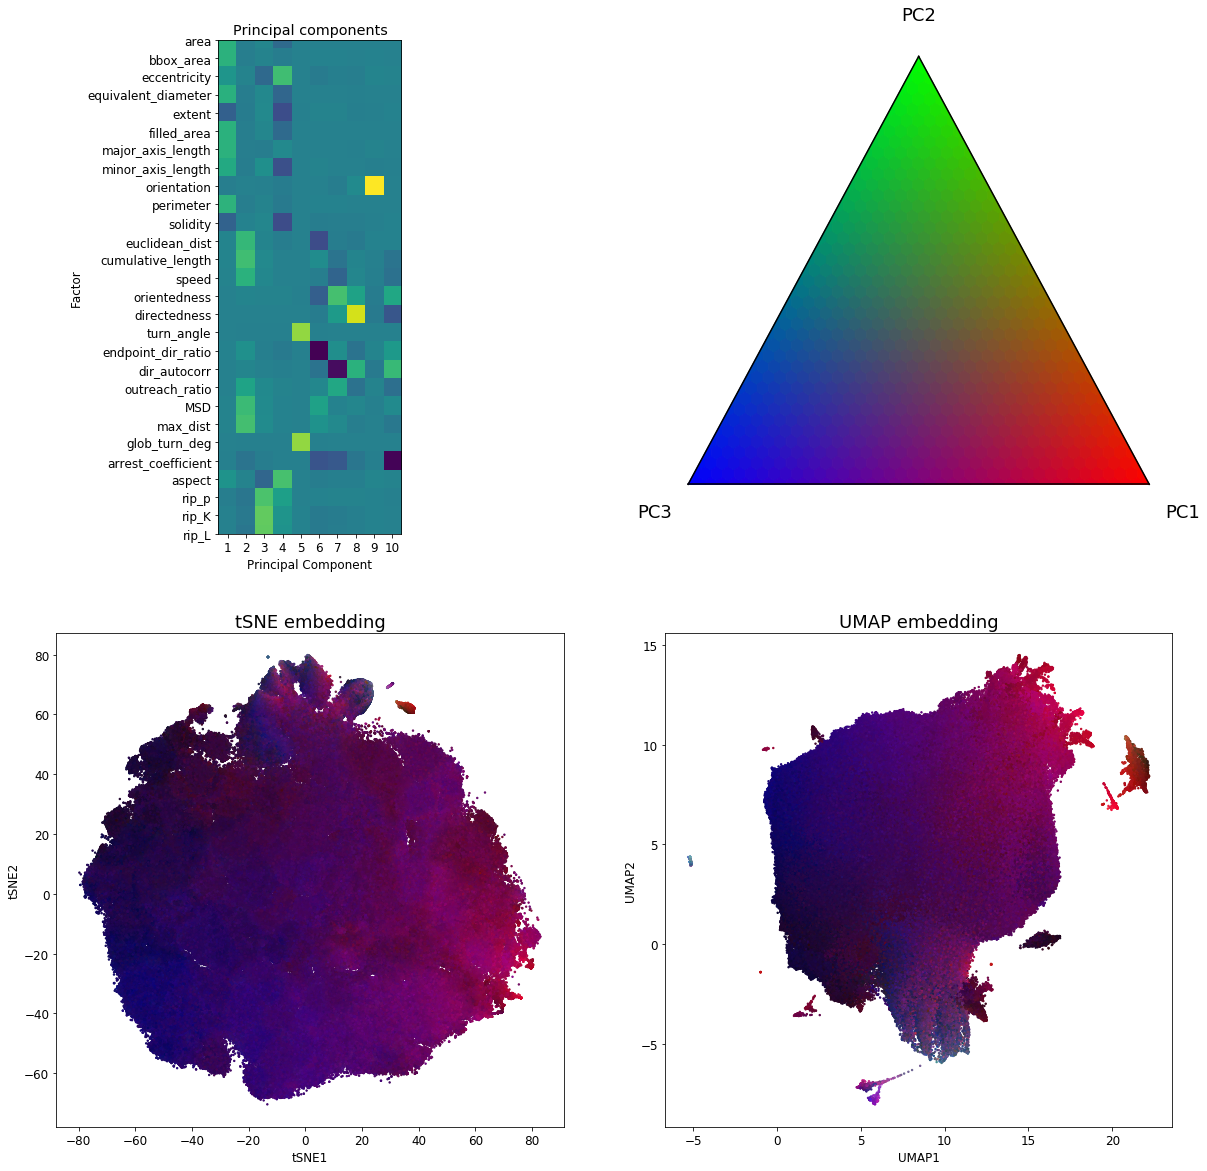

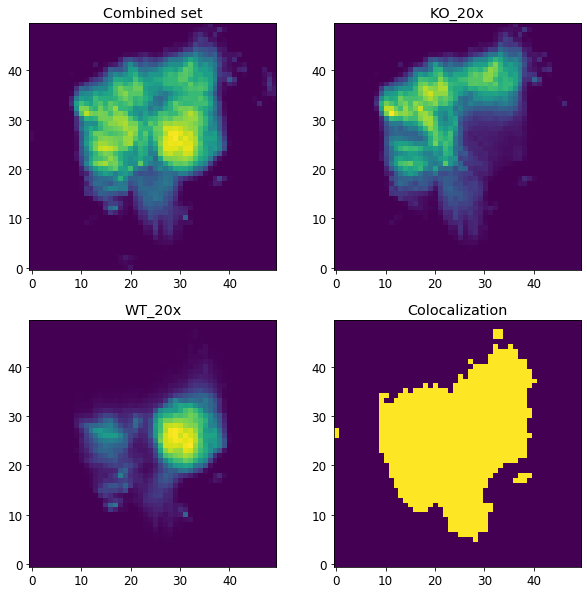

In [15]:
f = pca_factor_vis(dr_df,DR_FACTORS)
f=dimension_reduction_subplots(dr_df)
f=spatial_img_coloc(dr_df, xy='umap',thresh=10,n_bins=50)

##### Dissect the lowd embedding by conditions

['KO_20x' 'WT_20x']
['KO_100x' 'WT_100x']


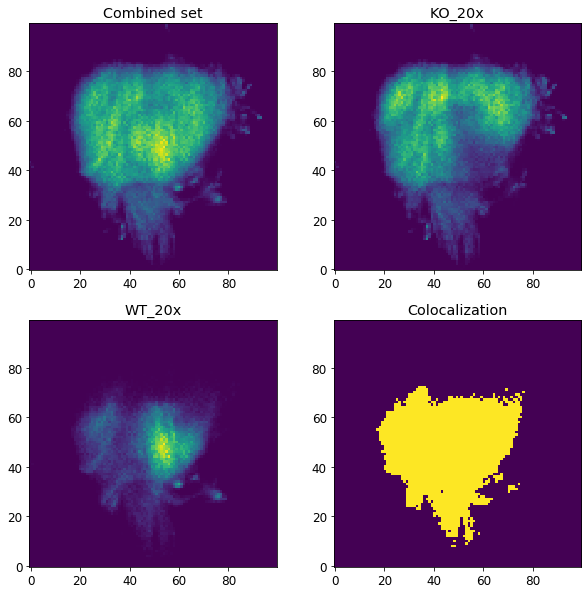

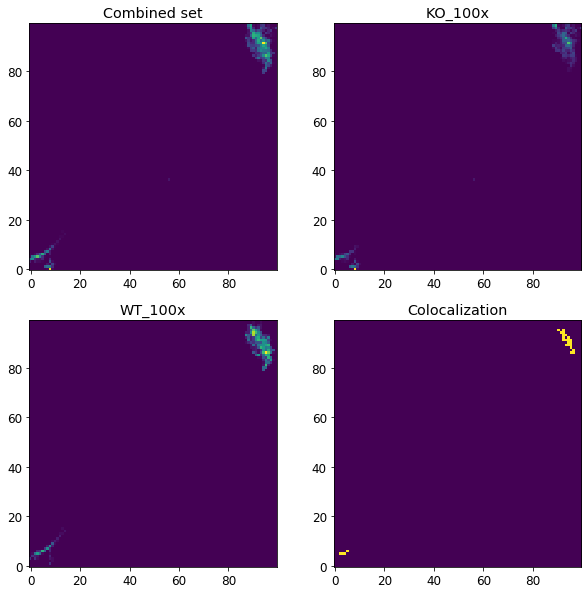

In [20]:
sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('20x')]
sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('100x')]

xy = 'UMAP'
f1=spatial_img_coloc(sub_df_1, xy=xy,thresh=10,n_bins=100)
f2=spatial_img_coloc(sub_df_2, xy=xy,thresh=10,n_bins=100)

['WT_20x' 'WT_100x']
['KO_20x' 'KO_100x']


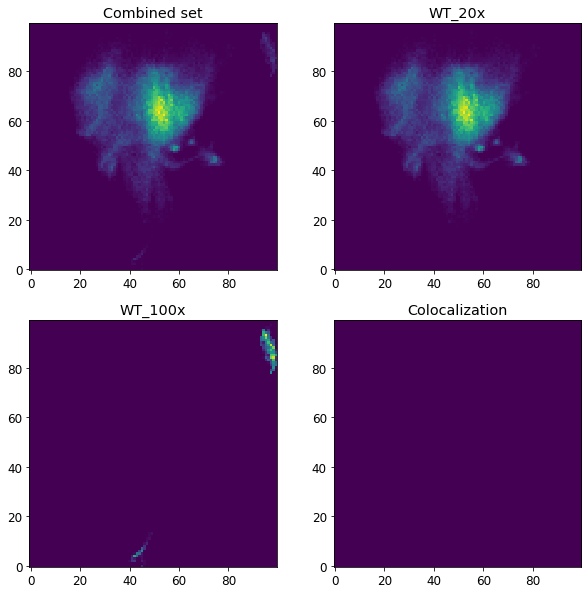

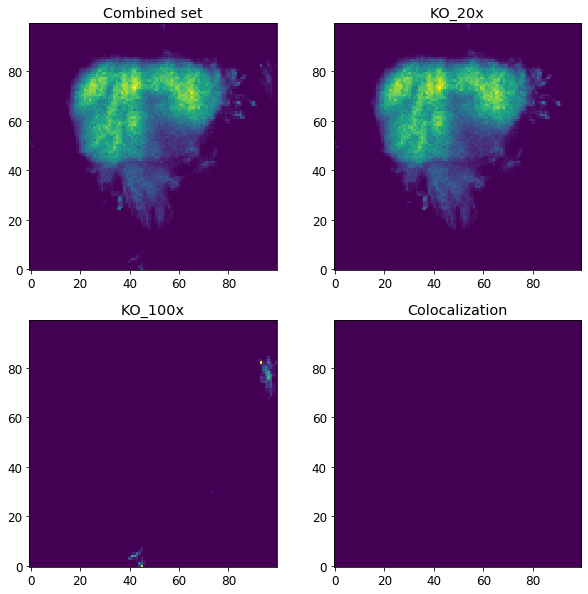

In [21]:
sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('WT')]
sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('KO')]

xy = 'UMAP'
f1=spatial_img_coloc(sub_df_1, xy=xy,thresh=1,n_bins=100)
f2=spatial_img_coloc(sub_df_2, xy=xy,thresh=1,n_bins=100)

In [ ]:
dr_contour_matrix(dr_df,n_grid_pts=4, dr_method='umap',t_window=8) # dr_method='umap'

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

loading:  D://Michael_Shannon/CELLPLATO2022_TESTING/20x_100x_high_temp_res\CAMKO_20x\Condition_20x_ICAMKO_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 62%|███████████████████████████████████████████████████▎                              | 10/16 [00:06<00:02,  2.79it/s]

loading:  D://Michael_Shannon/CELLPLATO2022_TESTING/20x_100x_high_temp_res\CAMWT_20x\Condition_20x_ICAMWT_tracks
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False


 81%|██████████████████████████████████████████████████████████████████▋               | 13/16 [00:13<00:03,  1.08s/it]

coords.shape:  (437663, 5)
seg.shape:  (2400, 1024, 1024)


 94%|████████████████████████████████████████████████████████████████████████████▉     | 15/16 [00:13<00:00,  1.10it/s]

loading:  D://Michael_Shannon/CELLPLATO2022_TESTING/20x_100x_high_temp_res\NK92WT_100x\NK92WT_8


OSError: Unable to open file (unable to open file: name = 'D://Michael_Shannon/CELLPLATO2022_TESTING/20x_100x_high_temp_res\NK92WT_100x\NK92WT_8.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

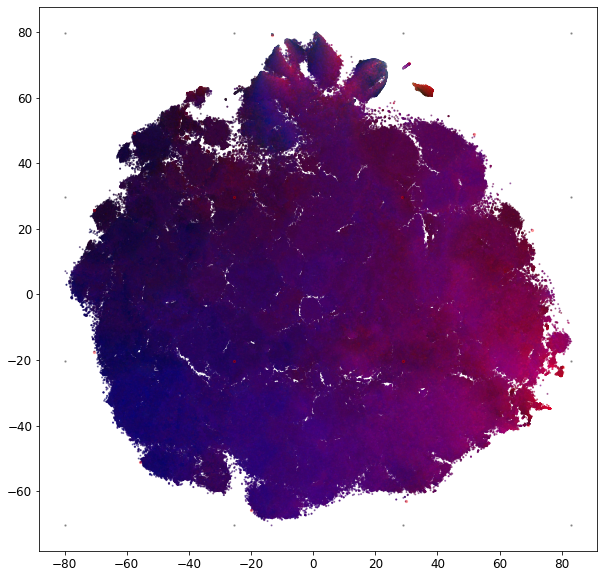

In [33]:
dr_contour_matrix(dr_df,n_grid_pts=4, dr_method='tSNE',t_window=8) # dr_method='umap'

### Cluster the cell behaviour

In [ ]:

dr_method = CLUSTER_BY

lab_dr_df = hdbscan_clustering(dr_df, cluster_by=dr_method, plot=False)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[30,10])
draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='condition',ax=ax1,draw_pts=True,save_path=CLUST_PARAMS_DIR+'condition')
draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='PCs',ax=ax2,legend=True,draw_pts=True,save_path=CLUST_PARAMS_DIR+'pca')
draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='cluster',ax=ax3,draw_pts=True,save_path=CLUST_PARAMS_DIR+'cluster')


##### Save files to shared folder for reopening in other notebooks and reusing with future analysis

In [ ]:
# # Save dr_df to shared data folder
# dr_df.to_csv(SAVED_DATA_PATH + 'dr_df.csv')

# # Save comb_df to shared data folder
# lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')

In [ ]:
'''
Note another issue of cyclic dependencies here.
'''

In [ ]:
# Run the trajectory clustering pipeline
lab_dr_df, traj_list, cluster_lst = trajectory_clustering_pipeline(lab_dr_df, traj_factor='umap', dist_metric='hausdorff', filename_out='std_dr_df_traj')

plot_traj_cluster_avg(traj_list, cluster_lst, label='')
trajectory_cluster_vis(lab_dr_df,traj_factor='umap', scatter=True)
datashader_lines(lab_dr_df, 'UMAP1', 'UMAP2',color_by='traj_id', categorical=True, identifier='traj_id')

# Overwrite saved lab_dr_df
lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')


### Cluster switching analysis

In [ ]:
# Count the cluster changes
sum_labels, tptlabel_dr_df = count_cluster_changes(lab_dr_df)
display(sum_labels)

time_superplot(tptlabel_dr_df, 'n_changes',t_window=None)

### Cluster Purity

In [ ]:
clust_sum_df = cluster_purity(lab_dr_df) 
display(clust_sum_df)
trajclust_sum_df = cluster_purity(lab_dr_df, cluster_label='traj_id')
display(trajclust_sum_df)

In [ ]:
'''Note: accepts multiple dataframe inputs, could accept just one..'''
f=purity_plots(lab_dr_df, clust_sum_df,lab_dr_df,trajclust_sum_df)

In [ ]:
clust_sum_t_df = cluster_composition_timecourse(lab_dr_df)
cluster_timeplot(clust_sum_t_df)

In [ ]:
# Count the number of cells that fall into each cluster - show on per condition and replicate basis.
lab_count_df = get_label_counts(lab_dr_df, per_rep=True)

# Plot the counts per subgroup in a swarm plot
fig = px.strip(lab_count_df, x="label", y="count", color="Condition")
fig.show()

In [ ]:
'''
Some of the above should be saved to the shared data folder as they
are very time-consuming
'''

In [ ]:
OVERWRITE_DATAFRAMES = False

if OVERWRITE_DATAFRAMES:
    # Save dataframes to shared data folder
    tavg_df.to_csv(SAVED_DATA_PATH + 'tavg_df.csv')
    comb_df.to_csv(SAVED_DATA_PATH + 'comb_df.csv')
    dr_df.to_csv(SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')

In [70]:
'''
!!!!!!!!!!!!!!!!!!!!
DEVELOPMENT BOOKMARK
!!!!!!!!!!!!!!!!!!!!
'''

# # Re-import the module we're testing
import importlib

import data_processing.pipelines
from data_processing.pipelines import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.pipelines)

import data_processing.data_wrangling
from data_processing.data_wrangling import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.data_wrangling)

import data_processing.data_io
from data_processing.data_io import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.data_io)


import data_processing.time_calculations
from data_processing.time_calculations import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.time_calculations)

import data_processing.trajectory_clustering
from data_processing.trajectory_clustering import * #import the module here, so that it can be reloaded.
importlib.reload(data_processing.trajectory_clustering)

import visualization.trajectory_visualization 
from visualization.trajectory_visualization  import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.trajectory_visualization )

import visualization.low_dimension_visualization 
from visualization.low_dimension_visualization  import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.low_dimension_visualization )

import visualization.timecourse_visualization 
from visualization.timecourse_visualization  import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.timecourse_visualization)

import visualization.superplots
from visualization.superplots import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.superplots)

import visualization.cluster_visualization
from visualization.cluster_visualization import * #import the module here, so that it can be reloaded.
importlib.reload(visualization.cluster_visualization)

<module 'visualization.cluster_visualization' from 'D:\\githubsoftware\\cellplato-2022\\visualization\\cluster_visualization.py'>

In [ ]:
#Minimal pipelines:
comb_df = combine_dataframes(populate_experiment_list())
comb_df = measurement_pipeline(comb_df)
dr_df = dr_pipeline(comb_df, dr_factors=DR_FACTORS) 
comparative_visualization_pipeline(dr_df)
lab_dr_df = cluster_analysis_pipeline(dr_df,CLUSTER_BY)
lab_dr_df, traj_list, cluster_lst = trajectory_clustering_pipeline(lab_dr_df, traj_factor=CLUSTER_BY, dist_metric='hausdorff', filename_out='std_dr_df_traj')

cluster_switching_pipeline(lab_dr_df) # Not generating plots in notebook.

lab_dr_df.to_csv(SAVED_DATA_PATH + 'lab_dr_df.csv')

In [ ]:
'''

plots_of_differences_plotly(tavg_df, factor=factor, ctl_label=CTL_LABEL)
ValueError: 'NK92WT_20x' is not in list

'''